In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('taxi_peru.csv', sep=';')

In [6]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'df has y rows and x columns'
где y – число строк, а x – число колонок.

In [7]:
df_shape='df has {0} rows and {1} columns' \
        .format(df.shape[0],df.shape[1])
df_shape

'df has 23111 rows and 19 columns'

2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма: task2_1.png (в папке)
Ответ будет: task2_2.png (в папке)

In [8]:
task2 = pd.DataFrame( {'client_id':[np.NaN, 3998.0, np.NaN, np.NaN, 5736.0, 3998.0], \
         'sex':[np.NaN, 1.0, np.NaN, np.NaN, 0.0, 1.0], \
         'wealth': [np.NaN, 'high', np.NaN, np.NaN, 'high', 'high'], \
         'age':['58', '55', '46', '23', '44', '53']})
#,'sex', 'wealth', 'age'

In [9]:
na_nubmer = task2.apply(lambda x: x.isna().sum())

In [10]:
task2.isna().sum()

client_id    3
sex          3
wealth       3
age          0
dtype: int64

In [11]:
na_nubmer

client_id    3
sex          3
wealth       3
age          0
dtype: int64

3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [12]:
df_dtypes = df.dtypes
df_dtypes

journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object

4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [13]:
task2 = task2.astype({'age':'int'})

In [14]:
task2.dtypes

client_id    float64
sex          float64
wealth        object
age            int32
dtype: object

5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [56]:
#task2 = task2.drop(['age', 'sex'], axis=1)
#ask2.drop(columns=['age', 'sex'], inplace=True)
task2

,client_id,wealth
0,NaN,NaN
1,3998.0,high
2,NaN,NaN
3,NaN,NaN
4,5736.0,high
5,3998.0,high


6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [59]:
task2.drop_duplicates(subset=['client_id'], inplace=True)
task2

,client_id,wealth
0,NaN,NaN
1,3998.0,high
4,5736.0,high


7) Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]

In [17]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers=[]
for number in numbers:
    if number == 0:
        break
    elif number > 0:
        positive_numbers.append(number)
positive_numbers
            

[1, 3]

8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .


In [18]:
taxi=pd.read_csv('taxi_peru.csv', sep=';')

In [19]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [20]:
taxi.shape

(23111, 19)

In [21]:
#taxi['start_at']=pd.to_datetime(taxi['start_at'], format='%d%b%Y:%H:%M:%S.%f')
taxi[["start_at", "end_at", "arrived_at"]] = taxi[["start_at", "end_at", "arrived_at"]].apply(pd.to_datetime)

In [22]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [23]:
taxi=taxi.query('start_type== "asap" or start_type == "reserved"')

In [24]:
taxi.start_type.nunique()

2

In [25]:
taxi.shape

(23091, 19)

9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')


In [26]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')

In [27]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


9.1) ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз


In [28]:
maximum_lateness_driver = taxi.query("start_type == 'reserved' and wait_time > 0.0") \
                                .groupby('driver_id', as_index=False) \
                                .agg({'wait_time':'count'}) \
                                .rename(columns={'wait_time':'number_lateness'}) \
                                .sort_values('number_lateness', ascending=False) \
                                .head(1)

In [29]:
maximum_lateness_driver

,driver_id,number_lateness
24,406921adcca37705ef527b4246c0cfea,67


10) Подумайте, что может влиять на число опозданий из прошлого задания

In [30]:
taxi.query("start_type == 'reserved' and wait_time > 0.0") \
                                .groupby(['driver_id'], as_index=False) \
                                .agg({'wait_time':'count'}) \
                                .rename(columns={'wait_time':'number_lateness'}) \
                                .sort_values('number_lateness', ascending=False) 

,driver_id,number_lateness
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


11) ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 


In [31]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.weekday
taxi = taxi.astype({'weekday':'int64'})

In [32]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,5
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,5
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,1
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,3


In [33]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
weekday                      int64
dtype: object

In [34]:
def weekdays(i):
    #for i in x:
        if i ==0:
            return ('Monday')
        elif i == 1:
            return ('Tuesday')
        elif i ==2:
            return ('Wednesday')
        elif i == 3:
            return ('Thursday')
        elif i == 4:
            return ('Friday')
        elif i == 5:
            return ('Saturday')
        elif i == 6:
            return ('Sunday')

In [35]:
taxi['weekday'] = taxi['weekday'].apply(weekdays)

In [36]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,...,drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0,7,Saturday
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,...,drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0,13.0,10,Saturday
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,...,drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0,9,Tuesday
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,...,drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0,4,Thursday


12) ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 


In [37]:
orders_per_month = taxi.groupby('month', as_index=False) \
                        .agg({'journey_id':'count'}) \
                        .rename(columns= {'journey_id':'num_orders'})
orders_per_month

,month,num_orders
0,1,573
1,2,766
2,3,983
3,4,1445
4,5,1584
5,6,1936
6,7,1512
7,8,2120
8,9,2598
9,10,3240


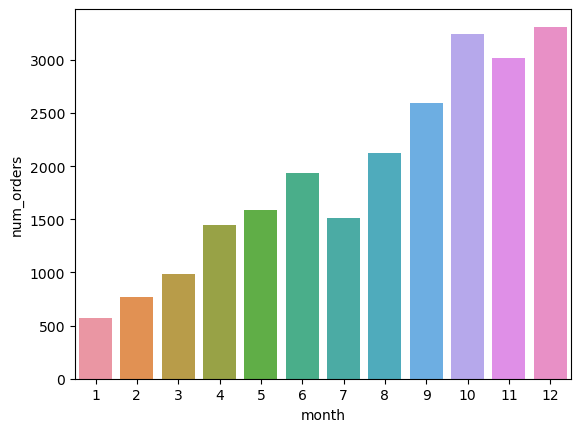

In [38]:
graph = sns.barplot(x='month', y='num_orders', data = orders_per_month)

13) ⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?


In [39]:
orders_per_weekday = taxi.groupby('weekday', as_index=False) \
                        .agg({'journey_id':'count'}) \
                        .rename(columns = {'journey_id':'num_orders'})

In [40]:
orders_per_weekday

,weekday,num_orders
0,Friday,3332
1,Monday,4018
2,Saturday,3569
3,Sunday,3752
4,Thursday,3133
5,Tuesday,2965
6,Wednesday,2322


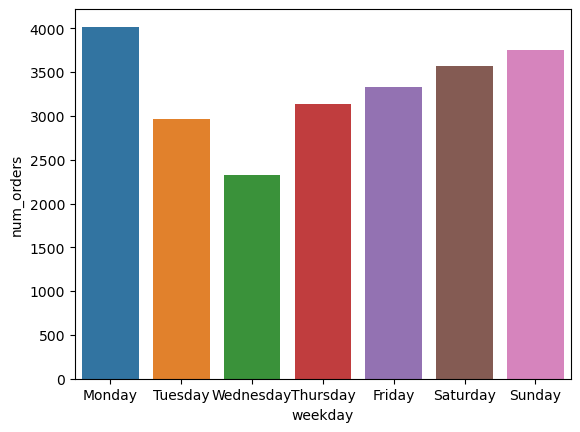

In [41]:
graph2 = sns.barplot(x = 'weekday', y = 'num_orders', 
                     data = orders_per_weekday, order=['Monday', 'Tuesday', 'Wednesday', 
                                                       'Thursday', 'Friday', 'Saturday', 'Sunday'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


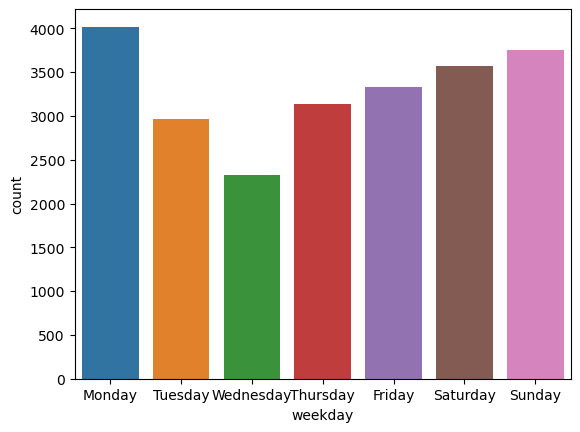

In [42]:
graph2_2 = sns.countplot(taxi['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 
                                                       'Thursday', 'Friday', 'Saturday', 'Sunday'])

14) ⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. 
Могут пригодиться:
groupby – группировка
nunique – число уникальных значений
plot.line – линейная диаграмма

In [43]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
month                        int64
weekday                     object
dtype: object

In [44]:
MAU = taxi.groupby('month', as_index=False) \
            .agg({'user_id':pd.Series.nunique}) 
MAU

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


In [45]:
xticks = range(1,13)

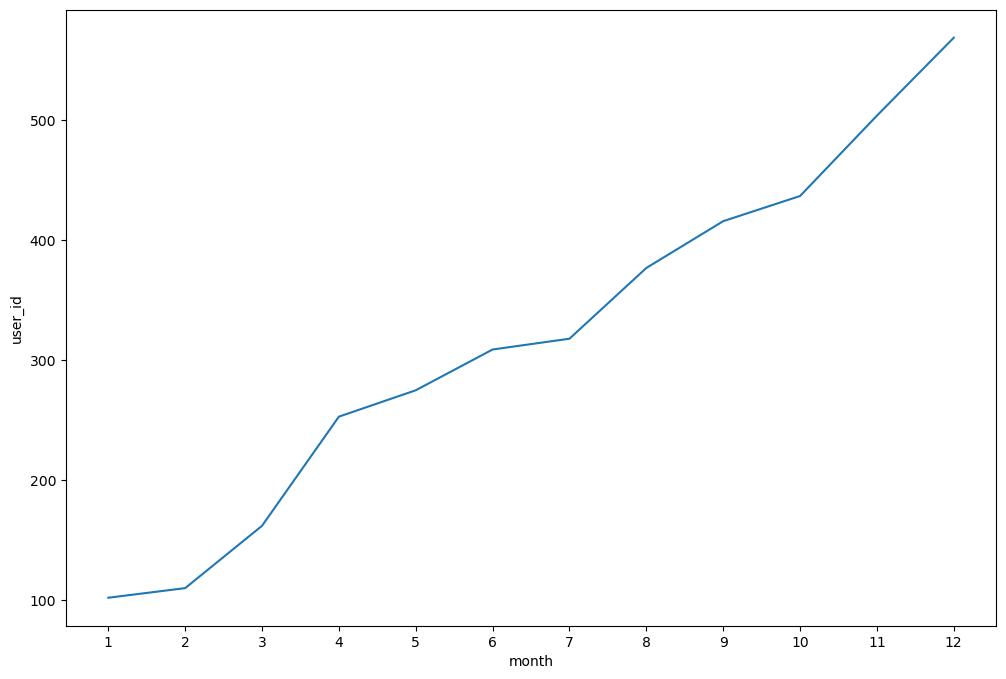

In [46]:
plt.figure(figsize=(12,8))
sns.lineplot(x='month', y='user_id', data=MAU, markers="o")
plt.xticks(xticks);
#graph3 = MAU.plot.line(x='month', y='user_id', figsize=(12,8))